# Bibliotecas Utilizadas

__NumPy__

NumPy é uma biblioteca usada para realizar operações em Arrays Multidimensionais.

__Pandas__

A biblioteca Pandas é utilizada para análise de dados.

__Matplotlib__

Matplotlib é uma biblioteca para criação de gráficos e visualização de dados em geral.

__Seaborn__

A biblioteca Seaborn trabalha em cima do matplotlib e ajuda a melhorar o visual dos gráficos.

__sklearn-learn__

É uma biblioteca desenvolvida especificamente para aplicação prática de machine learning. Esta biblioteca dispõe de ferramentas simples e eficientes para análise preditiva de dados.

In [18]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
# Mostra os gráficos, suprimindo mensagens
%matplotlib inline 

# Carrega dados
df = pd.read_csv('https://raw.githubusercontent.com/xAbSoLuTz/ProjetoIntegrado2022/main/dados/ocorrencias_cenipa.csv')

# Dropando as colunas que não vão ser utilizadas
df.drop(['data'], axis=1, inplace=True)
df.drop(['hora'], axis=1, inplace=True)
df.drop(['codigo'], axis=1, inplace=True)
df.drop(['descricao'], axis=1, inplace=True)
df.drop(['cidade'], axis=1, inplace=True)
df.drop(['aeronave_motor_quantidade'], axis=1, inplace=True)
df.drop(['aeronave_fase_operacao'], axis=1, inplace=True)


df.columns

Index(['tipo', 'estado', 'ano', 'aeronave_liberada', 'status_investigacao',
       'aeronaves_envolvidas', 'ocorrencia_saida_pista', 'aeronave_tipo',
       'aeronave_fabricante', 'motor_tipo', 'aeronave_assentos',
       'aeronave_ano_fabricacao', 'aeronave_pais_fabricante',
       'aeronave_nivel_dano'],
      dtype='object')

```
# Mostrando as colunas que vão ser utilizadas
```


In [19]:
col_estado = df['estado']
col_estado.value_counts()

SP    1239
MG     482
RJ     480
PR     441
RS     334
GO     286
PA     263
MT     255
AM     217
BA     200
SC     166
MS     132
DF     129
PE      90
CE      78
ES      70
MA      68
AC      54
RR      49
TO      46
PI      36
AL      30
RO      30
PB      23
SE      21
RN      14
AP       9
Name: estado, dtype: int64

```
# Número de acidentes por estado
```

In [20]:
len(df['tipo'].unique())

3

```
# Quantidade de tipos de acidentes diferentes que ocorreram
```



In [21]:
# Criando o campo região para deixar melhor visivel
nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
norte = ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
centroOeste = ['MT', 'MS', 'GO', 'DF']
sudeste = ['SP', 'RJ', 'ES', 'MG']
sul =  ['PR', 'RS', 'SC']

# Baseado no array "condicoes" vai ser inserido o valor do array "escolhas" na nova coluna "regiao"
condicoes = [
    (df['estado'].isin(nordeste)),
    (df['estado'].isin(norte)),
    (df['estado'].isin(centroOeste)),
    (df['estado'].isin(sudeste)),
    (df['estado'].isin(sul))
  ]
escolhas = ['Nordeste', 'Norte', 'Centro Oeste', 'Sudeste', 'Sul']
df['regiao'] = np.select(condicoes, escolhas)

# Regressão linear com o número de assentos

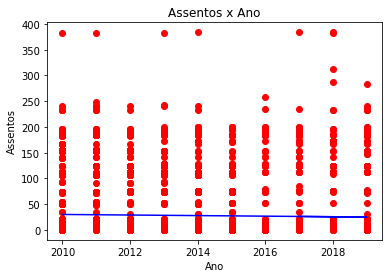

In [66]:
X = df[["ano"]]
y = df[["aeronave_assentos"]]

regressor = LinearRegression()
regressor.fit(X, y)

y_pred = regressor.predict(X)

plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Assentos x Ano')
plt.xlabel('Ano')
plt.ylabel('Assentos')
plt.show()

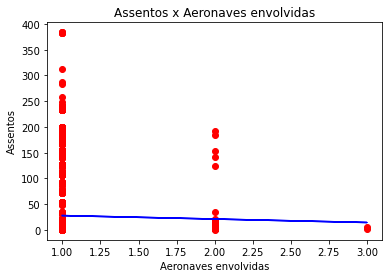

In [65]:
X = df[["aeronaves_envolvidas"]]
y = df[["aeronave_assentos"]]

regressor = LinearRegression()
regressor.fit(X, y)

y_pred = regressor.predict(X)

plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Assentos x Aeronaves envolvidas')
plt.xlabel('Aeronaves envolvidas')
plt.ylabel('Assentos')
plt.show()

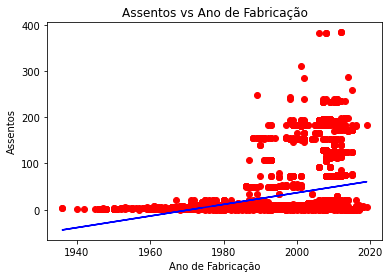

In [64]:
df.drop(df[df['aeronave_ano_fabricacao'] == 0].index, inplace = True)
df.drop(df[df['aeronave_ano_fabricacao'] == 9999].index, inplace = True)

X = df[["aeronave_ano_fabricacao"]]
y = df[["aeronave_assentos"]]

regressor = LinearRegression()
regressor.fit(X, y)

y_pred = regressor.predict(X)

plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Assentos vs Ano de Fabricação')
plt.xlabel('Ano de Fabricação')
plt.ylabel('Assentos')
plt.show()

Como pode ser visto nos gráficos, o eixo X representa no primeiro gráfico o ano, no segundo a quantidade de aeronaves envolvidas e no último o ano de fabricação que se envolveram em acidentes, enquanto o eixo Y sempre representa o número de assentos das aeronaves.

É perceptível que o número de assentos vá crescendo ao passar do tempo, já que pelo motivo das aeronaves terem a função principal de deslocamento rápido entre grandes distâncias e que fiquem cada vez maiores para suportar mais passageiros para viagens. Além disso é possível perceber que com isso o número de acidentes acabe aumentando devido ao maior número de aeronaves no céu.

Outra coisa interessante de se notar com relação ao número de assentos é que quanto menor o porte maior é a quantidade de acidentes.

# Demonstração de Dados da Estatística 

__Média: É a soma de todos os números do conjunto de dados e então dividindo o resultado pelo número de valores do conjunto.__

In [6]:
print('Média de acidentes por ano: ', round(len(df)/10, 2))

Média de acidentes por ano:  524.2


__Moda: É aquele resultado mais recorrente no conjunto, ou seja, com maior frequência absoluta.__

In [7]:
modaEstado = df['estado'].mode().to_string(index=False)
modaAno = df['ano'].mode().to_string(index=False)
print('Estado que mais teve acidentes: ', modaEstado)
print('Ano que mais teve acidentes: ', modaAno)

Estado que mais teve acidentes:  SP
Ano que mais teve acidentes:  2013


__Mediana: É o valor que ocupa a posição central dos valores quando organizamos esses dados em ordem.__

In [8]:
print('Mediana do ano de fabricação: ', int(df['aeronave_ano_fabricacao'].median()))

Mediana do ano de fabricação:  1992


__Desvio Padrão: É uma medida que expressa o grau de dispersão de um conjunto de dados. Ou seja, o desvio padrão indica o quanto um conjunto de dados é uniforme. Quanto mais próximo de 0 for o desvio padrão, mais homogêneo são os dados.__

In [9]:
print('Desvio Padrão do Ano: ', df['ano'].std())
print('Desvio Padrão do número de assentos: ', df['aeronave_assentos'].std())

Desvio Padrão do Ano:  2.8497500882703446
Desvio Padrão do número de assentos:  54.528085458047016


# Ocorrências

__Tipo__

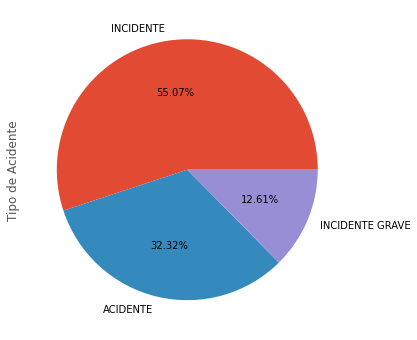

In [ ]:
# Visualizando as porcentagens dos tipos de acidentes
plt.style.use("ggplot")
df['tipo'].value_counts().plot(kind='pie',autopct='%1.2f%%', label="Tipo de Acidente" ,figsize=(8, 6))
plt.show()

__Dos acidentes que ocorrem no Brasil o tipo "incidente" domina com mais da metade da porcentagem total__

__Como pode ser visto, a maior parte dos tipos de acidentes é composta por incidentes tendo 55,1%, onde o incidente é um erro que não causa lesão__

__Tipo x Região__

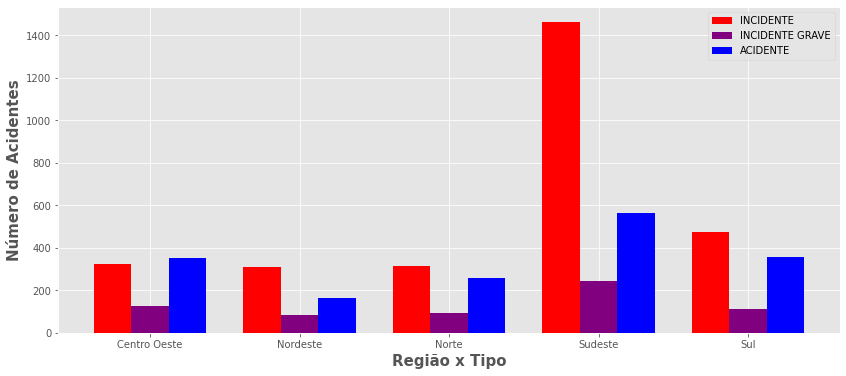

In [ ]:
regiaoTipo = df.value_counts(["regiao", "tipo"]).sort_index()

# Tamanho
fig = plt.subplots(figsize =(14, 6))
barWidth = 0.25

# Colocando os valores em arrays
incidente = [regiaoTipo[1], regiaoTipo[4], regiaoTipo[7], regiaoTipo[10], regiaoTipo[13]]
incidenteGrave = [regiaoTipo[2], regiaoTipo[5], regiaoTipo[8], regiaoTipo[11], regiaoTipo[14]]
acidente = [regiaoTipo[0], regiaoTipo[3], regiaoTipo[6], regiaoTipo[9], regiaoTipo[12]]
 
# Colocando as posições das barras do eixo X
br1 = np.arange(len(incidente))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Definindo os valores e customizando a visualização
plt.bar(br1, incidente, color ='r', width = barWidth, label ='INCIDENTE')
plt.bar(br2, incidenteGrave, color ='purple', width = barWidth, label ='INCIDENTE GRAVE')
plt.bar(br3, acidente, color ='b', width = barWidth, label ='ACIDENTE')

# Adicionando Xticks
plt.xlabel('Região x Tipo', fontweight ='bold', fontsize = 15)
plt.ylabel('Número de Acidentes', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(incidente))], sorted(df['regiao'].unique()))

plt.legend()
plt.show()

__Como da para ver no gráfico a maioria dos acidentes que ocorreram no Brasil entre 2010 e 2019 ocorreram no estado do sudeste, envolvendo principalmente o tipo "incidente"__

__Status das aeronaves__

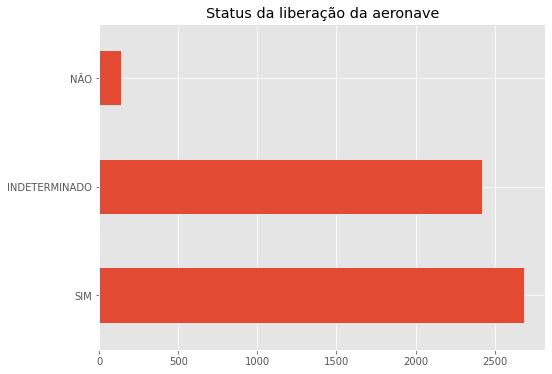

In [ ]:
df['aeronave_liberada'].value_counts().plot(kind='barh', title="Status da liberação da aeronave" ,figsize=(8, 6))

__Como pode ser notado desses acidentes a maioria ou foi liberada para voo ou ficaram com o status de indeterminado__

__Status das Investigações dos Acidentes__

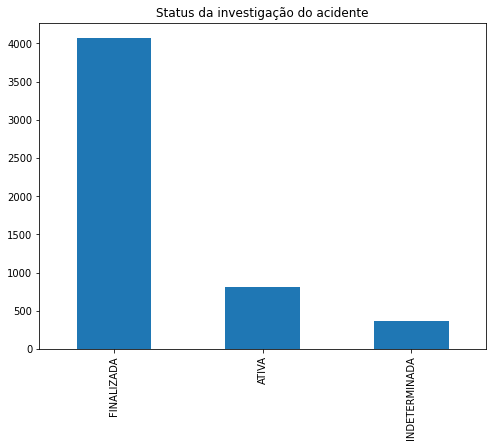

In [33]:
df['status_investigacao'].value_counts().plot(kind='bar', title="Status da investigação do acidente" ,figsize=(8, 6))

__É notado que quase todos os acidentes que ocorreram tiveram suas investigações concluidas.__

__Quantidades de aeronaves envolvidas por acidente__

Text(2800, 2.0, 'Desvio Padrão: 0.11159345431706039')

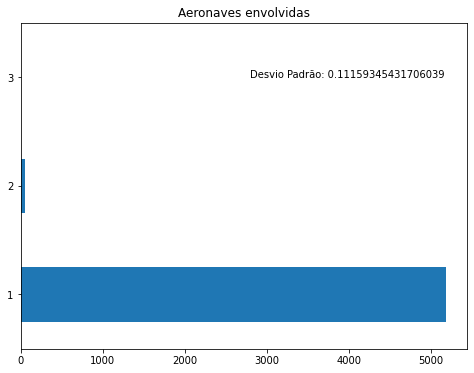

In [32]:
df['aeronaves_envolvidas'].value_counts().plot(kind='barh', title="Aeronaves envolvidas" ,figsize=(8, 6))
dpAeronavesEnvolvidas = str(df['aeronaves_envolvidas'].std())
plt.text(2800, 2.0, 'Desvio Padrão: ' + dpAeronavesEnvolvidas)

__Como pode ser notado a grande maioria dos acidentes que ocorrem envolve apenas uma aeronave.
Vale notar que o desvio padrão chega perto de 0 de tão constante é o resultado de apenas uma aeronave por acidente__

__BoxPlot do tipo de aeronave x ano__

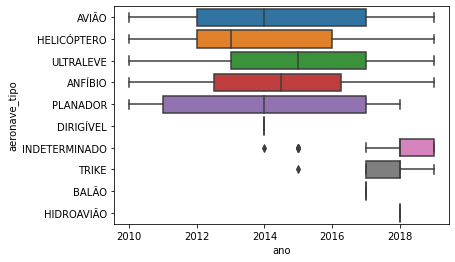

In [44]:
aeronave_tipo = df["aeronave_tipo"]
ano = df["ano"]
sns.boxplot(x=ano, y=aeronave_tipo)
plt.show()

# Conclusão:

O principal objetivo desse projeto foi demonstrar o conhecimento obtido através do estudo para poder elaborar e construir Gráficos e estatistícas sobre acidentes aerios ocorridos no Brasil entre 2010 e 2019.

Além de abordar diversos assuntos diferentes e utilizar várias bibliotecas foi abordada muitas ocorrências.

# Referências Bibliográficas:

__https://didatica.tech/a-biblioteca-scikit-learn-pyhton-para-machine-learning__

__https://harve.com.br/blog/programacao-python-blog/numpy-python-o-que-e-vantagens-e-tutorial-inicial/__

__https://harve.com.br/blog/programacao-python-blog/pandas-python-vantagens-e-como-comecar/__

__https://docs.python.org/pt-br/3/library/statistics.html#statistics.mean__

__https://www.todamateria.com.br/desvio-padrao/__

__https://stackoverflow.com/questions/35523635/extract-values-in-pandas-value-counts__

__https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html__

__https://github.com/rochawennis/Projeto_Integrador_2021/blob/main/Acidentes_Aereos_Ocorridos_no_Brasil_de_2010_a_2019.ipynb__